## 2. Intensity Transformation for a Brain Proton Density Image

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

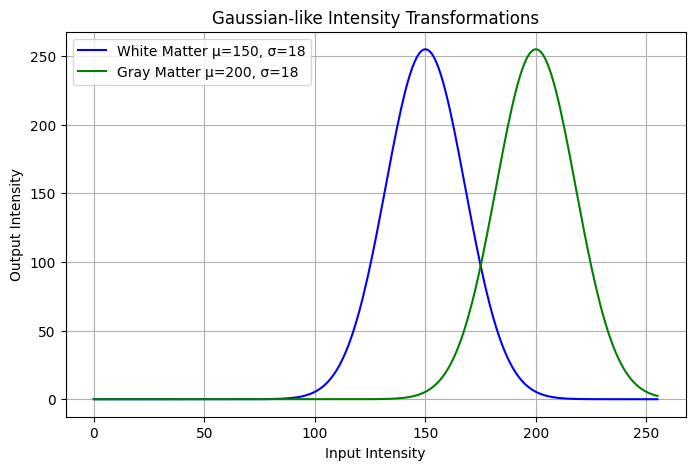

In [2]:
# Load grayscale image
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

# Gaussian Parameters
mu_wm, sigma_wm = 150, 18  # white matter
mu_gm, sigma_gm = 200, 18  # gray matter

# Intensity range
x = np.linspace(0, 255, 256)

# Gaussian transformation functions
T_wm = np.exp(-((x - mu_wm) ** 2) / (2 * sigma_wm ** 2))
T_gm = np.exp(-((x - mu_gm) ** 2) / (2 * sigma_gm ** 2))

# Normalize to 0-255
T_wm = (T_wm / T_wm.max()) * 255 # Gaussian White matter
T_gm = (T_gm / T_gm.max()) * 255 # Gaussian Gray matter

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, T_wm, label=f"White Matter μ={mu_wm}, σ={sigma_wm}", color='blue')
plt.plot(x, T_gm, label=f"Gray Matter μ={mu_gm}, σ={sigma_gm}", color='green')
plt.title("Gaussian-like Intensity Transformations")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.legend()
plt.grid(True)
plt.show()

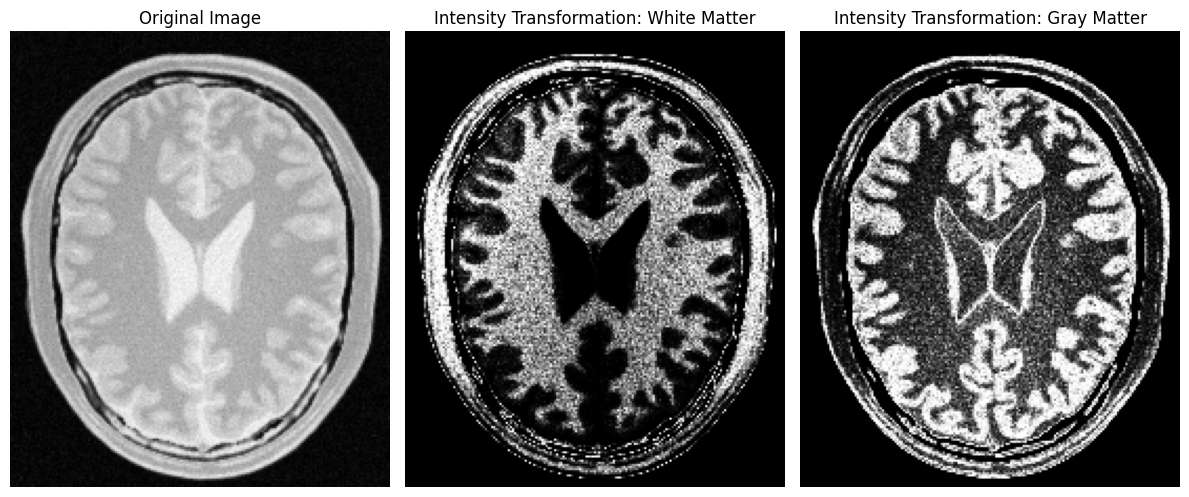

In [3]:
white_transform = T_wm[brain]
gray_transform =T_gm[brain]

# Display the images
fig, ax = plt.subplots(1, 3, figsize=(12,6))

ax[0].imshow(brain, cmap="gray")
ax[0].set_title('Original Image')
ax[0].axis("off")
ax[1].imshow(white_transform, cmap="gray")
ax[1].set_title('Intensity Transformation: White Matter')
ax[1].axis("off")
ax[2].imshow(gray_transform, cmap="gray")
ax[2].set_title('Intensity Transformation: Gray Matter')
ax[2].axis("off")

plt.tight_layout()
plt.show()

# Approach

A Gaussian intensity transformation was applied to the brain image, tuning its mean and standard deviation to target either white matter or gray matter intensity ranges. This smoothly boosted the selected range while preserving natural transitions and avoiding abrupt cutoffs.





# Interpretation


Centering the Gaussian on white matter or gray matter brightened and enhanced contrast in the targeted tissue while leaving other areas largely unchanged. The improvement was clear in the output, though original image noise remained visible.